In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#some settings
sns.set_palette("Paired")

In [2]:
df = pd.read_csv('data/TelcoCustomerChurn.csv')
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

<br> Churn by Demographic variables

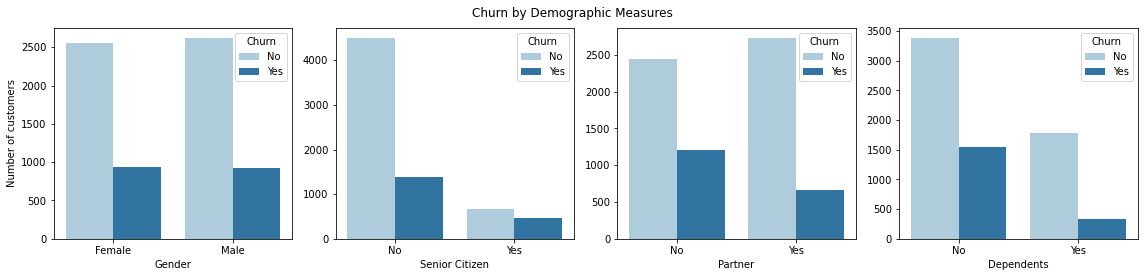

In [3]:
fig, ax = plt.subplots(1,4, figsize=(16,4))

ax[0] = sns.countplot(x='gender',hue='Churn',data=df, ax=ax[0])
ax[1] = sns.countplot(x='SeniorCitizen',hue='Churn',data=df, ax=ax[1])
ax[2] = sns.countplot(x='Partner',hue='Churn',data=df, ax=ax[2], order=['No', 'Yes'])
ax[3] = sns.countplot(x='Dependents',hue='Churn',data=df, ax=ax[3])

#Labels
ax[1].set_xticklabels(['No','Yes'])
ax[0].set(xlabel='Gender',ylabel='Number of customers')
ax[1].set(xlabel='Senior Citizen',ylabel='')
ax[2].set(xlabel='Partner',ylabel='')
ax[3].set(xlabel='Dependents',ylabel='')

#Title
fig.suptitle('Churn by Demographic Measures', position=(.5,0.95), fontsize=12)
fig.tight_layout()

#Save plot
plt.savefig('images/1_1_demographic_informations.png', dpi=100)

In [4]:
print(df.groupby(['gender', 'Churn']).agg({'Churn' : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum()))
print(df.groupby(['SeniorCitizen', 'Churn']).agg({'Churn' : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum()))
print(df.groupby(['Partner', 'Churn']).agg({'Churn' : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum()))
print(df.groupby(['Dependents', 'Churn']).agg({'Churn' : 'count'}).groupby(level=0).apply(lambda x: 100*x/x.sum()))

                  Churn
gender Churn           
Female No     73.079128
       Yes    26.920872
Male   No     73.839662
       Yes    26.160338
                         Churn
SeniorCitizen Churn           
0             No     76.393832
              Yes    23.606168
1             No     58.318739
              Yes    41.681261
                   Churn
Partner Churn           
No      No     67.042021
        Yes    32.957979
Yes     No     80.335097
        Yes    19.664903
                      Churn
Dependents Churn           
No         No     68.720860
           Yes    31.279140
Yes        No     84.549763
           Yes    15.450237


<br> Churn by services variables

In [5]:
#Churn by Number of services
#Count the number of services for each customer
df['servicesCount'] = 0
for row in range(df.shape[0]):
    current = df.loc[row, services].isin(['Yes','DSL','Fiber optic'])
    df.loc[row,'servicesCount'] = current[current == True].count()

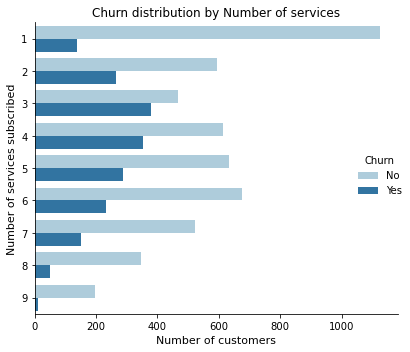

In [6]:
#Plot
sns.catplot(y='servicesCount',hue='Churn',kind='count',data=df)

#Insert labels and title
plt.title("Churn distribution by Number of services", size=12)
plt.xlabel("Number of customers", size=11)
plt.ylabel("Number of services subscribed", size=11)
plt.tight_layout()
#Save plot
plt.savefig("images/1_2_churn_by_number_services.png", dpi=70)

In [7]:
print(df.groupby(['servicesCount', 'Churn'])['customerID'].count()/df.shape[0]*100)

servicesCount  Churn
1              No       15.987505
               Yes       1.959392
2              No        8.419708
               Yes       3.776800
3              No        6.616499
               Yes       5.395428
4              No        8.703677
               Yes       4.997870
5              No        8.987647
               Yes       4.103365
6              No        9.598183
               Yes       3.294051
7              No        7.440011
               Yes       2.158171
8              No        4.912679
               Yes       0.695726
9              No        2.797104
               Yes       0.156183
Name: customerID, dtype: float64


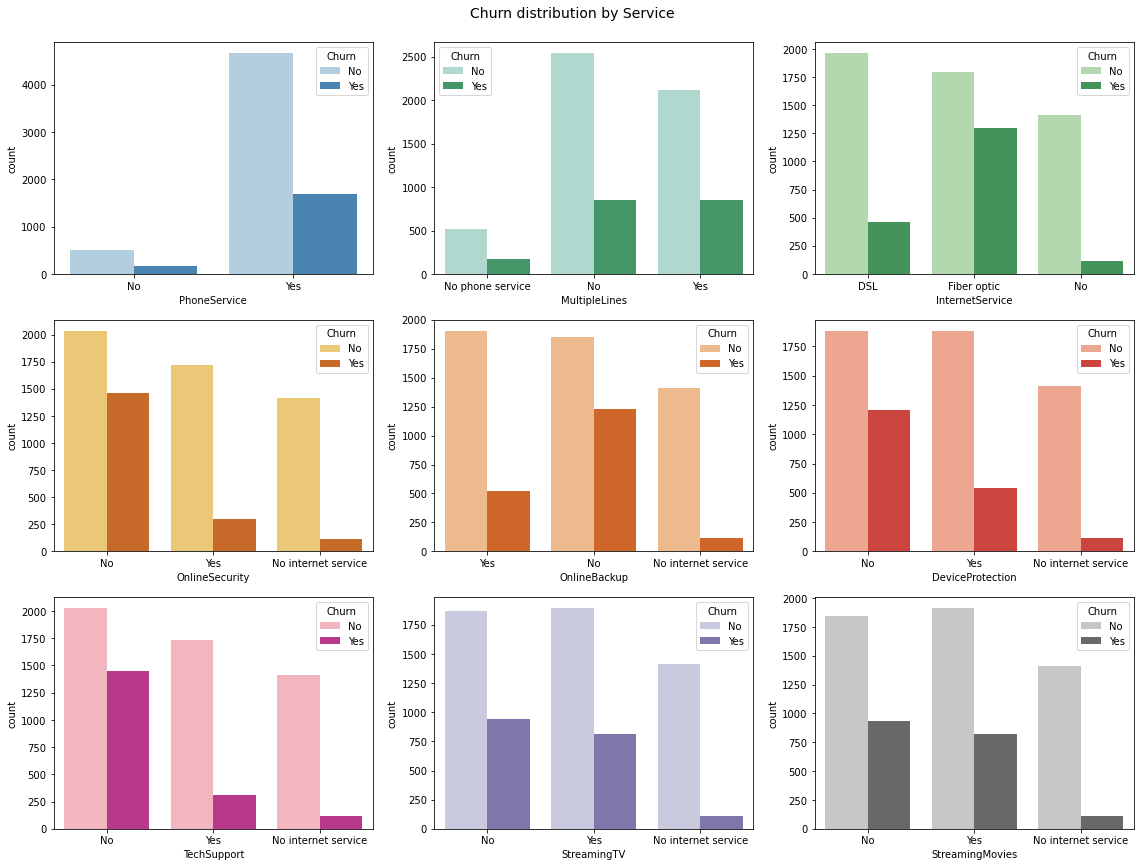

In [8]:
#Churn by Service
fig, ax = plt.subplots(3,3, figsize=(16,12))

ax[0][0] = sns.countplot(x="PhoneService", hue="Churn", data=df, ax=ax[0][0], palette='Blues')
ax[0][1] = sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=ax[0][1], palette='BuGn')
ax[0][2] = sns.countplot(x="InternetService", hue="Churn", data=df, ax=ax[0][2], palette='Greens')
ax[1][0] = sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=ax[1][0], palette='YlOrBr')
ax[1][1] = sns.countplot(x="OnlineBackup", hue="Churn", data=df, ax=ax[1][1], palette='Oranges')
ax[1][2] = sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=ax[1][2], palette='Reds')
ax[2][0] = sns.countplot(x="TechSupport", hue="Churn", data=df, ax=ax[2][0], palette='RdPu')
ax[2][1] = sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=ax[2][1], palette='Purples')
ax[2][2] = sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=ax[2][2], palette='Greys')

fig.suptitle('Churn distribution by Service', position=(.5,1), fontsize=14)
fig.tight_layout()

#Save plot
plt.savefig("images/1_3_churn_by_services.png", dpi=70)

<br> Churn by account variables

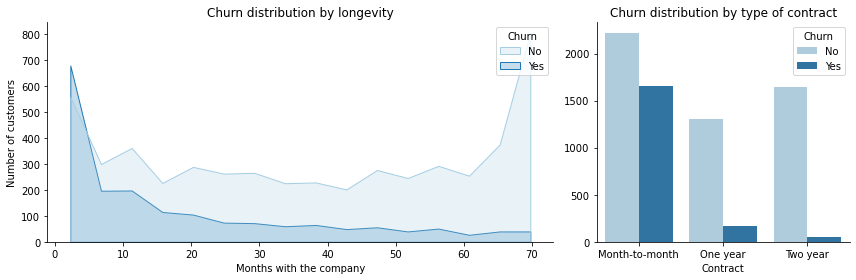

In [9]:
#Churn by tenure and type of contract
fig, ax = plt.subplots(1,2, figsize=(12,4), gridspec_kw={'width_ratios': [2, 1]})

#Churn by tenure 
ax[0] = sns.histplot(x='tenure',hue='Churn',stat='count',data=df,element="poly",ax=ax[0])
ax[1] = sns.countplot(x='Contract',hue='Churn',data=df,ax=ax[1])

#Remove spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

#Labels and titles
ax[0].set(xlabel='Months with the company',ylabel='Number of customers',title='Churn distribution by longevity')
ax[1].set(xlabel='Contract',ylabel='',title='Churn distribution by type of contract')

fig.tight_layout()

#Save plot
plt.savefig("images/1_4_churn_by_longevity_and_contract.png", dpi=100)

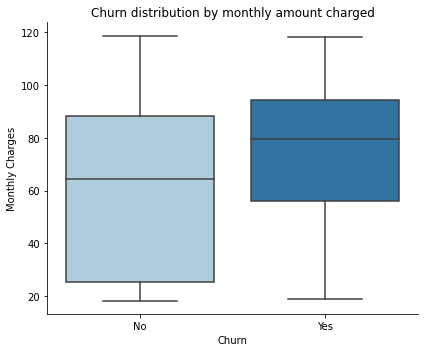

In [10]:
#Churn by Monthly Amount Charged
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax = sns.boxplot(y='MonthlyCharges',x='Churn',data=df)

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#labels and title
ax.set(xlabel='Churn',ylabel='Monthly Charges',title='Churn distribution by monthly amount charged')

fig.tight_layout()

#Save plot
plt.savefig("images/1_5_churn_by_monthly_amount.png", dpi=60)

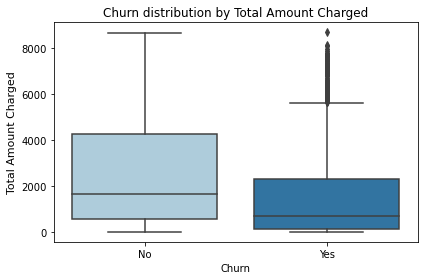

In [11]:
#Churn by Total Amount Charged
#Convert column 'TotalCharges' to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.NaN).astype(float)

sns.boxplot(y='TotalCharges',x='Churn',data=df)
plt.ylabel("Total Amount Charged", size=11)
plt.title("Churn distribution by Total Amount Charged", size=12)
plt.tight_layout()

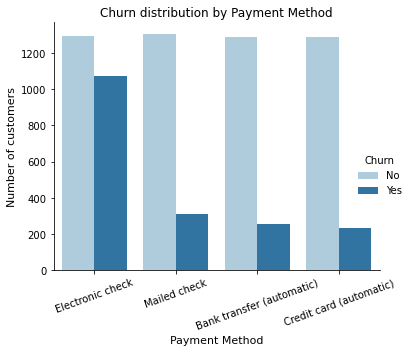

In [12]:
#Churn by Payment Method
sns.catplot(x='PaymentMethod',hue='Churn',kind='count',data=df)

#Insert labels and title
plt.xticks(rotation=20)
plt.xlabel("Payment Method", size=11)
plt.ylabel("Number of customers", size=11)
plt.title("Churn distribution by Payment Method", size=12)
plt.tight_layout()

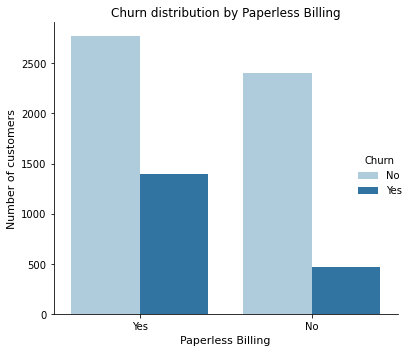

In [13]:
#Churn by Paperless billing
sns.catplot(x='PaperlessBilling',hue='Churn',kind='count',data=df)

#Insert labels and title
plt.xlabel("Paperless Billing", size=11)
plt.ylabel("Number of customers", size=11)
plt.title("Churn distribution by Paperless Billing", size=12)
plt.tight_layout()